Note about Gaussian Procces

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataset = "../../all"

In [3]:
metadata = pd.read_csv(dataset+'/training_set_metadata.csv')
list(metadata)

['object_id',
 'ra',
 'decl',
 'gal_l',
 'gal_b',
 'ddf',
 'hostgal_specz',
 'hostgal_photoz',
 'hostgal_photoz_err',
 'distmod',
 'mwebv',
 'target']

In [4]:
metadata['hostgal_photoz'].isna().sum()

0

In [5]:
metadata['hostgal_photoz_err'].isna().sum()

0

In [6]:
missing = metadata['distmod'].isna().sum()
exists = metadata['distmod'].count().sum()

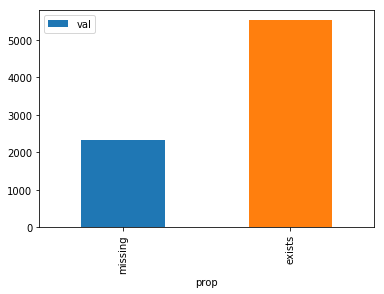

In [7]:
#% of non null distmod vs null distmod
stats = pd.DataFrame({'prop':['missing', 'exists'], 'val':[missing, exists]})
stats.plot.bar(x='prop', y='val')

In [8]:
#get non null distmod interies
distmodPred = metadata[~metadata['distmod'].isna()]
distmodPred.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90
6,1598,347.846710,-64.760857,318.929827,-49.143596,1,0.1352,0.1820,0.0304,39.7279,0.019,90


In [9]:
X = distmodPred[["hostgal_photoz", "hostgal_photoz_err"]]
y = distmodPred["distmod"]
X.shape

(5523, 2)

In [10]:
#normalize data
min_max_scaler = preprocessing.MinMaxScaler(copy=False)
X_scaled = min_max_scaler.fit_transform(X)

In [11]:
def iter_minibatches(X,y,chunksize):
    # Provide chunks one by one
    chunkstartmarker = 0
    while chunkstartmarker < X.shape(0):
        chunkrows = range(chunkstartmarker,chunkstartmarker+chunksize)
        X_chunk, y_chunk = X.loc[chunkrows,:],y.loc[chunkrows,:]
        yield X_chunk, y_chunk
        chunkstartmarker += chunksize

In [23]:
#batcherator = iter_minibatches(chunksize=1000)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
kernel = DotProduct() + WhiteKernel()
gaussian = GaussianProcessRegressor()
gaussian.fit(X_train,y_train)
print(y_train)
#need to find a way to split this cause this algo doesn't work on big datasets
#crossVal = cross_validate(gaussian, X, y, cv=10,return_estimator=True, scoring="neg_mean_squared_log_error",error_score='raise')

2085    42.5287
6686    43.2831
7113    39.7010
4342    42.7120
6085    41.6510
7338    37.4282
5050    43.8318
595     39.9355
3433    40.5147
5388    39.8448
4271    40.2974
4798    42.4550
3476    39.7727
3628    40.7510
3869    45.1242
5405    39.8063
3543    42.6133
3223    41.4266
4947    46.3985
1471    42.3760
2835    46.3560
570     46.4417
3552    46.5881
6200    42.3702
218     40.2112
5070    39.7664
270     42.4521
836     37.7408
871     40.2576
5195    39.9068
         ...   
3784    40.1683
2790    43.9290
3516    38.6984
1448    38.7778
648     41.7991
4028    40.2666
6859    45.6656
5791    46.0679
4729    42.6358
6442    42.6812
1575    40.6429
7155    41.5235
7550    40.4760
3330    40.0881
3269    46.7272
1045    43.5302
2281    41.6819
177     40.2113
4048    46.1381
4399    45.9415
4806    36.8927
6252    42.4216
7578    40.6142
639     46.4260
4296    40.4287
5295    41.6637
7372    37.2516
7430    37.8506
7650    41.1752
1165    43.2479
Name: distmod, Length: 3

In [24]:
gaussian.score(X_test,y_test)
#crossVal
#np.argmax(crossVal['test_score'])
X = gaussian.predict(X)

In [25]:
X
#gaussian = crossVal['estimator'][0]

array([45.29437256, 40.28768158, 40.83692551, ..., 46.66223145,
       37.1063118 , 46.62394142])

Text(0.5, 0, 'hostgal_photoz')

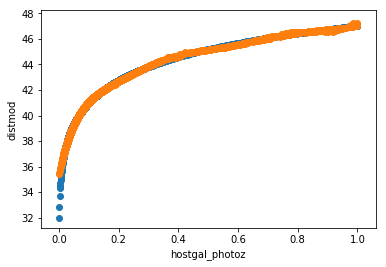

In [15]:
plt.scatter(x=X['hostgal_photoz'], y=y, label="distmod training")
plt.scatter(x=X['hostgal_photoz'], y=gaussian.predict(X), label="distmod predicted")
plt.ylabel("distmod")
plt.xlabel("hostgal_photoz")

In [16]:
gaussian.get_params(deep=True)

{'alpha': 1e-10,
 'copy_X_train': True,
 'kernel': None,
 'n_restarts_optimizer': 0,
 'normalize_y': False,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': None}

In [17]:
data = pd.read_csv(dataset+'/training_set.csv')
list(data)

['object_id', 'mjd', 'passband', 'flux', 'flux_err', 'detected']

In [18]:
data.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [19]:
single_object = data[data['object_id'] == 615 ]
single_object

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1
5,615,59752.4147,1,-1061.457031,6.472994,1
6,615,59752.4224,3,-524.954590,3.552751,1
7,615,59752.4334,4,-393.480225,3.599346,1
8,615,59752.4435,5,-355.886780,10.421921,1
9,615,59767.2968,2,-548.013550,3.462291,1


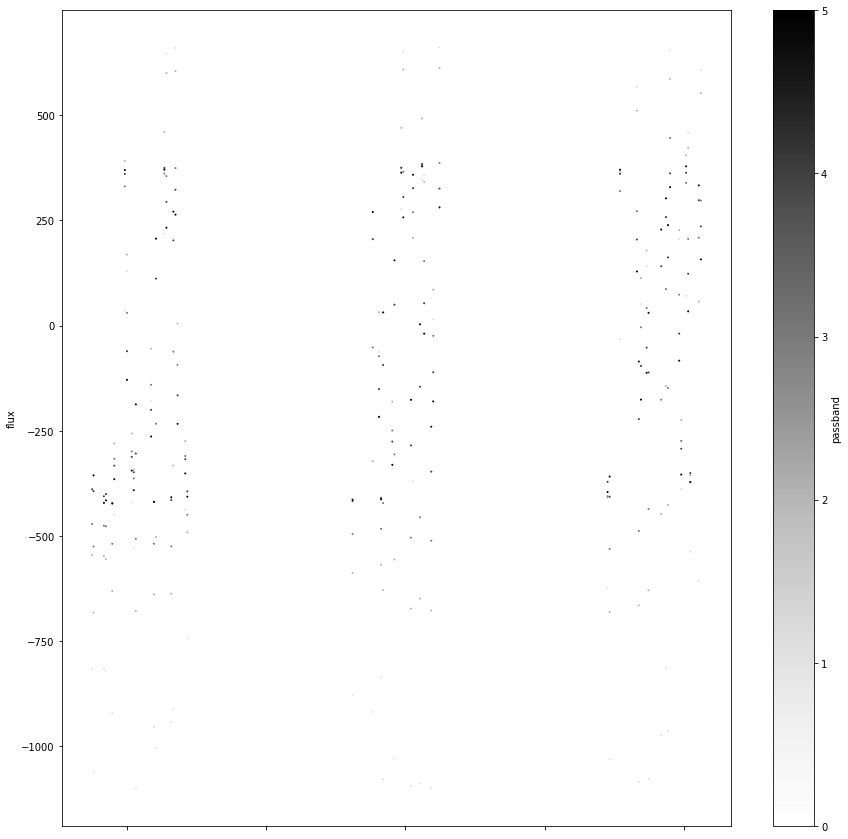

In [20]:
single_object.plot.scatter(x='mjd',y='flux',c='passband' ,s=1,figsize=(15,15))